In [1]:
#Bibliotecas ultilizadas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Carregando o dataset
url = "train.csv"

titanic = pd.read_csv(url)
#Vamos dar uma olhada no datset
titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
#vamos substitutor male por 0 e female por 1
titanic['Sex'] = titanic['Sex'].replace({'male':0, 'female':1})
#Agora vamos ver algumas informações sobre o dados
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [4]:
#Podemos perceber que as colunas Age e Cabin, possuem a maior quantidade de valores ausentes
#Vamos retirar a coluna de cabin, e retirar as linhas ue possuem age ausente
#Também vamos retirar a coluna de nomes para fazer os teste de correlação
names = titanic['Name']
titanic.drop(['Name','Cabin'],axis =1, inplace = True)
titanic = titanic[pd.notnull(titanic['Age'])] 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 61.4+ KB


In [6]:
#Vamos ver algumas correlações entre as variaveis
coor = titanic[titanic.columns[1:]].corr()['Survived']
coor = coor[1:]
coor #'como imterpretar?'

Pclass   -0.359653
Sex       0.538826
Age      -0.077221
SibSp    -0.017358
Parch     0.093317
Fare      0.268189
Name: Survived, dtype: float64

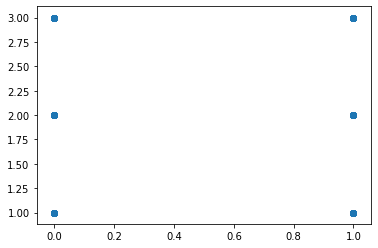

In [9]:
plt.scatter(titanic['Survived'], titanic['Pclass'])